# Importing libraries

In [1]:
import sys
from tqdm import tqdm   
import numpy as np
from iminuit import Minuit
import json

In [2]:
sys.argv = [
    'main.py',
    '--data_env', 'envs/DATA/DESI_QSO_Y1.env',
    '--sampler_env', 'envs/sampler/sound_singlepol.env',
    '--mock', '5',
    '--machine', 'MAC',
    '--reconstruction', 'False',
    '--omega_min', '100',
    '--omega_max', '500',
    '--EZMOCK', 'False',
    '--debug', 'True',
]

from main import *  # Replace with the name of your script file (without .py)

true
2025-04-16 15:54:38,780 - main - INFO - Processes: 32
2025-04-16 15:54:38,781 - main - INFO - DATA NGC file: /Users/s2223060/Desktop/LSS_DATA/AbacusSummit/QSO/z_0.8_2.1/pre_recon/pk/desi_survey_catalogs_Y1_mocks_SecondGenMocks_AbacusSummit_desipipe_v4_2_ffa_2pt_mock5_pk_pkpoles_QSO_NGC_z0.8-2.1_default_FKP_lin_nran18_cellsize6_boxsize10000_d0.001.txt
2025-04-16 15:54:38,781 - main - INFO - DATA SGC file: /Users/s2223060/Desktop/LSS_DATA/AbacusSummit/QSO/z_0.8_2.1/pre_recon/pk/desi_survey_catalogs_Y1_mocks_SecondGenMocks_AbacusSummit_desipipe_v4_2_ffa_2pt_mock5_pk_pkpoles_QSO_SGC_z0.8-2.1_default_FKP_lin_nran18_cellsize6_boxsize10000_d0.001.txt
2025-04-16 15:54:38,782 - main - INFO - COV NGC file: /Users/s2223060/Desktop/LSS_DATA/EZMocks/QSO/z_0.8_2.1/pre_recon/COV_desi_survey_catalogs_Y1_mocks_SecondGenMocks_EZmock_desipipe_v1_ffa_2pt_pk_pkpoles_QSO_NGC_z0.8-2.1_default_FKP_lin_nran4_cellsize6_boxsize10000_d0.001.txt
2025-04-16 15:54:38,783 - main - INFO - COV SGC file: /Users/s22

In [34]:
omega = 200
log_beta = 6
A = -0.5
N = 2*len(k)

PF_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,A,omega,log_beta])
BAO_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,0,1,0])

# Inject noise into BAO and PF data
noise_BAO = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)
noise_PF = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)

data_BAO_bare = theory(BAO_guess)
data_PF_bare = theory(PF_guess)

data_BAO = data_BAO_bare + noise_BAO
data_PF = data_PF_bare + noise_PF


mcmc.set_gelman_rubin({
    "N":1,
    "epsilon":10,
    "min_length":3000,
    "convergence_steps":10
})
fn_wf_ngc = None
fn_wf_sgc = None

2025-04-16 14:18:18,711 - mcmc_toolkit - WARNING - The gelman rubin requires 2 or more chains!
2025-04-16 14:18:18,712 - mcmc_toolkit - INFO - You are considering 3000 as the minimum length for the chain
2025-04-16 14:18:18,712 - mcmc_toolkit - INFO - Convergence test happens every 10 steps
2025-04-16 14:18:18,713 - mcmc_toolkit - INFO - Number of walkers: 260
2025-04-16 14:18:18,714 - mcmc_toolkit - INFO - Number of Parameters: 13
2025-04-16 14:18:18,715 - mcmc_toolkit - INFO - Number of parallel chains: 1
2025-04-16 14:18:18,728 - mcmc_toolkit - INFO - Preparing chain 0
2025-04-16 14:18:18,728 - mcmc_toolkit - INFO - Go!


100%|██████████| 3000/3000 [03:14<00:00, 15.39it/s]


2025-04-16 14:21:33,935 - mcmc_toolkit - INFO - Prepared data for Gelman-Rubin diagnostic calculation
2025-04-16 14:21:33,936 - mcmc_toolkit - INFO - All chains with the minimum length!
2025-04-16 14:21:33,937 - mcmc_toolkit - INFO - Checking convergence...
Removed 0.5 as burn in
2025-04-16 14:21:37,419 - mcmc_toolkit - INFO - 1D plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_1D_ALL.png
2025-04-16 14:21:37,422 - mcmc_toolkit - INFO - Gelman-Rubin diagnostic calculated: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:21:37,422 - mcmc_toolkit - INFO - epsilon = [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:21:37,422 - mcmc_toolkit - INFO - Convergence Achieved!
2025-04-16 14:21:37,423 - mcmc_toolkit - INFO - Plotting walkers position over steps...


/Users/s2223060/Desktop/primordial_features/mcmc_toolkit.py:205: RuntimeWarning: invalid value encountered in divide
  B += chain_length * (meanall - mean_chain[jj])**2 / (Nchains - 1)


2025-04-16 14:21:52,407 - mcmc_toolkit - INFO - Walkers plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_walkers.pdf
2025-04-16 14:21:52,407 - mcmc_toolkit - INFO - Plotting the correlation matrix...
2025-04-16 14:21:52,898 - mcmc_toolkit - INFO - Correlation matrix plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Corr.png
2025-04-16 14:21:52,898 - mcmc_toolkit - INFO - Making a corner plot...
Removed no burn in
plotting:  ['BNGC', 'BSGC']
plotting:  ['BNGC', 'a0']
plotting:  ['BNGC', 'a1']
plotting:  ['BNGC', 'a2']
plotting:  ['BNGC', 'a3']
plotting:  ['BNGC', 'a4']
plotting:  ['BNGC', 'alpha']
plotting:  ['BNGC', 'sigma_nl']
plotting:  ['BNGC', 'sigma_s']
plotting:  ['BNGC', 'As']
plotting:  ['BNGC', 'omega']
plotting:

100%|██████████| 3000/3000 [03:32<00:00, 14.13it/s]


2025-04-16 14:26:34,943 - mcmc_toolkit - INFO - Prepared data for Gelman-Rubin diagnostic calculation
2025-04-16 14:26:34,947 - mcmc_toolkit - INFO - All chains with the minimum length!
2025-04-16 14:26:34,948 - mcmc_toolkit - INFO - Checking convergence...
Removed 0.5 as burn in
2025-04-16 14:26:39,979 - mcmc_toolkit - INFO - 1D plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_1D_ALL.png
2025-04-16 14:26:39,981 - mcmc_toolkit - INFO - Gelman-Rubin diagnostic calculated: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:26:39,981 - mcmc_toolkit - INFO - epsilon = [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:26:39,981 - mcmc_toolkit - INFO - Convergence Achieved!
2025-04-16 14:26:39,981 - mcmc_toolkit - INFO - Plotting walkers position over steps...


/Users/s2223060/Desktop/primordial_features/mcmc_toolkit.py:205: RuntimeWarning: invalid value encountered in divide
  B += chain_length * (meanall - mean_chain[jj])**2 / (Nchains - 1)


2025-04-16 14:26:53,893 - mcmc_toolkit - INFO - Walkers plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_walkers.pdf
2025-04-16 14:26:53,893 - mcmc_toolkit - INFO - Plotting the correlation matrix...
2025-04-16 14:26:54,223 - mcmc_toolkit - INFO - Correlation matrix plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Corr.png
2025-04-16 14:26:54,224 - mcmc_toolkit - INFO - Making a corner plot...
Removed no burn in
plotting:  ['BNGC', 'BSGC']
plotting:  ['BNGC', 'a0']
plotting:  ['BNGC', 'a1']
plotting:  ['BNGC', 'a2']
plotting:  ['BNGC', 'a3']
plotting:  ['BNGC', 'a4']
plotting:  ['BNGC', 'alpha']
plotting:  ['BNGC', 'sigma_nl']
plotting:  ['BNGC', 'sigma_s']
plotting:  ['BNGC', 'As']
plotting:  ['BNGC', 'omega']
plotting:  ['BNGC

100%|██████████| 3000/3000 [03:17<00:00, 15.22it/s]


2025-04-16 14:31:21,503 - mcmc_toolkit - INFO - Prepared data for Gelman-Rubin diagnostic calculation
2025-04-16 14:31:21,506 - mcmc_toolkit - INFO - All chains with the minimum length!
2025-04-16 14:31:21,506 - mcmc_toolkit - INFO - Checking convergence...
Removed 0.5 as burn in
2025-04-16 14:31:24,655 - mcmc_toolkit - INFO - 1D plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_1D_ALL.png
2025-04-16 14:31:24,655 - mcmc_toolkit - INFO - Gelman-Rubin diagnostic calculated: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:31:24,656 - mcmc_toolkit - INFO - epsilon = [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:31:24,656 - mcmc_toolkit - INFO - Convergence Achieved!
2025-04-16 14:31:24,657 - mcmc_toolkit - INFO - Plotting walkers position over steps...


/Users/s2223060/Desktop/primordial_features/mcmc_toolkit.py:205: RuntimeWarning: invalid value encountered in divide
  B += chain_length * (meanall - mean_chain[jj])**2 / (Nchains - 1)


2025-04-16 14:31:40,401 - mcmc_toolkit - INFO - Walkers plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_walkers.pdf
2025-04-16 14:31:40,402 - mcmc_toolkit - INFO - Plotting the correlation matrix...
2025-04-16 14:31:40,815 - mcmc_toolkit - INFO - Correlation matrix plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Corr.png
2025-04-16 14:31:40,815 - mcmc_toolkit - INFO - Making a corner plot...
Removed no burn in
plotting:  ['BNGC', 'BSGC']
plotting:  ['BNGC', 'a0']
plotting:  ['BNGC', 'a1']
plotting:  ['BNGC', 'a2']
plotting:  ['BNGC', 'a3']
plotting:  ['BNGC', 'a4']
plotting:  ['BNGC', 'alpha']
plotting:  ['BNGC', 'sigma_nl']
plotting:  ['BNGC', 'sigma_s']
plotting:  ['BNGC', 'As']
plotting:  ['BNGC', 'omega']
plotting:  ['BNGC', '

100%|██████████| 3000/3000 [03:15<00:00, 15.38it/s]


2025-04-16 14:36:04,711 - mcmc_toolkit - INFO - Prepared data for Gelman-Rubin diagnostic calculation
2025-04-16 14:36:04,713 - mcmc_toolkit - INFO - All chains with the minimum length!
2025-04-16 14:36:04,713 - mcmc_toolkit - INFO - Checking convergence...
Removed 0.5 as burn in
2025-04-16 14:36:07,896 - mcmc_toolkit - INFO - 1D plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_1D_ALL.png
2025-04-16 14:36:07,897 - mcmc_toolkit - INFO - Gelman-Rubin diagnostic calculated: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:36:07,897 - mcmc_toolkit - INFO - epsilon = [nan nan nan nan nan nan nan nan nan nan nan nan nan]
2025-04-16 14:36:07,897 - mcmc_toolkit - INFO - Convergence Achieved!
2025-04-16 14:36:07,898 - mcmc_toolkit - INFO - Plotting walkers position over steps...


/Users/s2223060/Desktop/primordial_features/mcmc_toolkit.py:205: RuntimeWarning: invalid value encountered in divide
  B += chain_length * (meanall - mean_chain[jj])**2 / (Nchains - 1)


2025-04-16 14:36:21,731 - mcmc_toolkit - INFO - Walkers plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_walkers.pdf
2025-04-16 14:36:21,732 - mcmc_toolkit - INFO - Plotting the correlation matrix...
2025-04-16 14:36:22,146 - mcmc_toolkit - INFO - Correlation matrix plot saved to /Users/s2223060/Desktop/primordial_features/figures/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Corr.png
2025-04-16 14:36:22,146 - mcmc_toolkit - INFO - Making a corner plot...
Removed no burn in
plotting:  ['BNGC', 'BSGC']
plotting:  ['BNGC', 'a0']
plotting:  ['BNGC', 'a1']
plotting:  ['BNGC', 'a2']
plotting:  ['BNGC', 'a3']
plotting:  ['BNGC', 'a4']
plotting:  ['BNGC', 'alpha']


KeyboardInterrupt: 

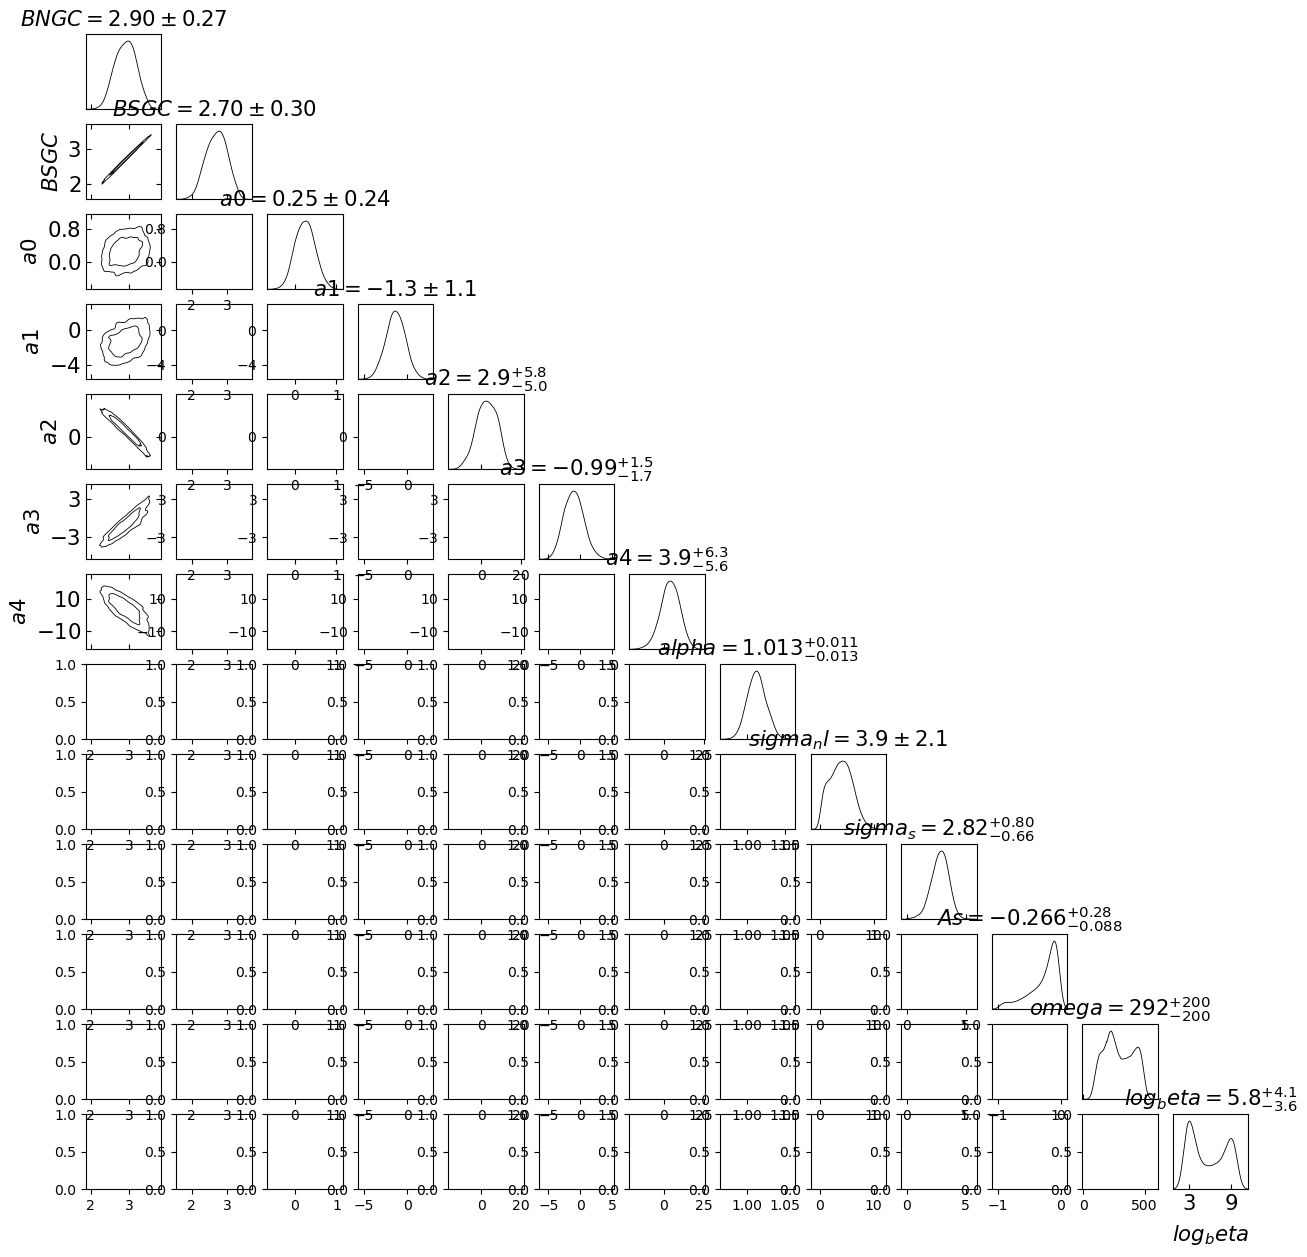

In [5]:
handle_final = 'noiseless_synthetic_'+handle
PrimordialFeature_likelihood.set_data(data_PF_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noisy_synthetic_'+handle
PrimordialFeature_likelihood.set_data(data_PF)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noiseless_BAO_'+handle
PrimordialFeature_likelihood.set_data(data_BAO_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

handle_final = 'noisy_BAO_'+handle
PrimordialFeature_likelihood.set_data(data_BAO)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [ ]:
mcmc.run(handle, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [5]:
import h5py as h5
from getdist import plots, MCSamples
%matplotlib inline

import matplotlib as mpl
# Define global rcParams settings
mpl.rcParams.update({
    # TICK SETTINGS
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'xtick.major.size': 4,      # major tick size in points
    'xtick.major.width': 1,     # major tick width in points
    'ytick.major.size': 4,      # major tick size in points
    'ytick.major.width': 1,     # major tick width in points

    # GRID SETTINGS
    'axes.grid': True,
    'grid.color': 'grey',
    'grid.linestyle': '-',
    'grid.linewidth': 0.7,
    'grid.alpha': 0.2,

    # LEGEND SETTINGS
    'legend.fancybox': True,
    'legend.facecolor': 'white',
    'legend.framealpha': 0.5,
    'legend.edgecolor': 'grey',

    # FIGURE & SUBPLOT SETTINGS
    'figure.autolayout': False,
    'figure.frameon': True,
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.96,

    # LINE SETTINGS
    'lines.linewidth': 1.5,

    # AXES SETTINGS
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.formatter.use_mathtext': True,  # use math text for scientific notation
    'axes.linewidth': 1.0,
    'axes.labelcolor': 'black',
    'axes.labelsize': 16,

    # FONT SETTINGS
    'font.family': 'serif',
    'font.size': 13,

    # TEXT SETTINGS
    'text.color': 'k',
    'text.usetex': False,

    # MATHTEXT SETTINGS
    'mathtext.cal': 'cursive',
    'mathtext.rm': 'serif',
    'mathtext.tt': 'monospace',
    'mathtext.it': 'serif:italic',
    'mathtext.bf': 'serif:italic:bold',
    'mathtext.sf': 'sans_serif',
    'mathtext.fontset': 'dejavusans',
})

tracer_colors = tracer_colors = {
    'DESI_Y1_LRG1': 'orange',
    'DESI_Y1_LRG2': 'orangered',
    'DESI_Y1_LRG3': 'firebrick',
    'DESI_Y1_QSO':  'seagreen',
    'DESI_Y1_ELG1': 'skyblue',
    'DESI_Y1_ELG2': 'steelblue'
}

In [20]:
# Define files
files = [
    '/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5'
]

# Load and concatenate chains
chains = []
logprobs = []

for f in files:
    with h5.File(f, 'r') as file:
        chains.append(file['mcmc']['chain'][:])
        logprobs.append(file['mcmc']['log_prob'][:])

combined_chain = np.concatenate(chains, axis=0)
combined_chain = combined_chain.reshape(-1, combined_chain.shape[-1])
#combined_chain[:,-2] = np.log10(combined_chain[:,-2])
combined_logprob = np.concatenate(logprobs, axis=0)
combined_logprob = combined_logprob.flatten()

In [21]:
# Parameter names and labels
names = ["BNGC", "BSGC", "a0", "a1", "a2", "a3", "a4", "alpha", "sigma_nl", "sigma_s", "A", "omega", "log_beta"]
labels = [r'B_{\rm NGC}', r'B_{\rm SGC}', r"a_0", r"a_1", r"a_2", r"a_3", r"a_4", r"\alpha",r"\Sigma_{\rm nl}",r"\Sigma_s", r"A", r"\log |\tau_f|",r"\log \beta"]

# Create combined MCSamples object
samples = MCSamples(
    samples=combined_chain,
    loglikes=-2 * combined_logprob,  # getdist expects -2*logL = chi2
    names=names,
    labels=labels,
    settings={'contours': [0.68, 0.95]},
    ranges = {'log_beta':[2.2,10],'A':[-1,0],'omega':[100,500]}
)

# Best-fit point
best_idx = np.argmax(combined_logprob)
best_fit = combined_chain[best_idx]
best_fit_dict = dict(zip(names, best_fit))

print(f"Best-fit As: {best_fit_dict['A']:.5f}")
print(f"Best-fit omega: {best_fit_dict['omega']:.5f}")

Removed no burn in
Best-fit As: -0.17063
Best-fit omega: 200.82078


2025-04-16 16:01:19,028 - root - WARNING - auto bandwidth for A very small or failed (h=0.00033827633832970343,N_eff=780000.0). Using fallback (h=0.007693047030821127)
2025-04-16 16:01:19,225 - root - WARNING - auto bandwidth for omega very small or failed (h=0.0003862136149096973,N_eff=780000.0). Using fallback (h=0.025117876165119138)
2025-04-16 16:01:19,419 - root - WARNING - auto bandwidth for log_beta very small or failed (h=0.00035832345342436546,N_eff=780000.0). Using fallback (h=0.012925052884356338)
2025-04-16 16:01:19,673 - root - WARNING - fine_bins_2D not large enough for optimal density: A, omega
2025-04-16 16:01:19,963 - root - WARNING - fine_bins_2D not large enough for optimal density: A, log_beta
2025-04-16 16:01:20,254 - root - WARNING - fine_bins_2D not large enough for optimal density: omega, log_beta


<Figure size 600x450 with 0 Axes>

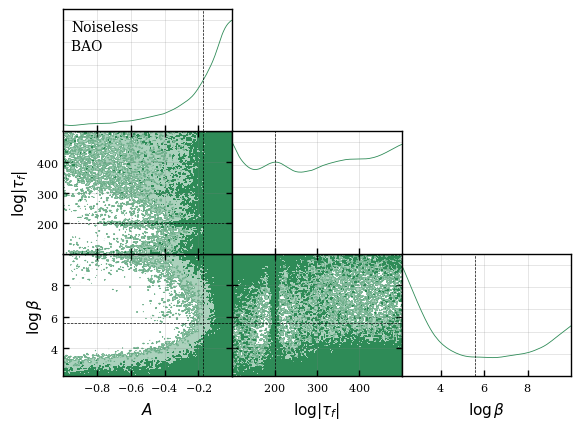

In [22]:
g1 = plots.get_single_plotter(width_inch=6)
g1.triangle_plot(
    samples,
    ['A', 'omega','log_beta'],
    line_args=[{'ls':'-', 'color':tracer_colors['DESI_Y1_QSO']}],
    contour_args=[{'ls':'-', 'color':tracer_colors['DESI_Y1_QSO']}],
    markers={k: best_fit_dict[k] for k in ['omega','A','log_beta']},
    marker_args={'lw': 0.5, 'color':'black'},filled = True
)
g1.add_text('Noiseless',-1.95,2.85, font = 'serif',fontsize = 10)
g1.add_text('BAO ',-1.95,2.7, font = 'serif',fontsize = 10)
#g1.export('noiseless_BAO.pdf')

# Binning the posteriors

In [23]:
# Define files
files = {
    "noiseless_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noiseless_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
}

chains = {}

for key, f in files.items():
    with h5.File(f, 'r') as file:
        chains[key] = file['mcmc']['chain'][:]

In [24]:
freq_edges = np.arange(100, 520, 20)  # edges for binning
freq_centers = 0.5 * (freq_edges[:-1] + freq_edges[1:])

# Prepare storage for results
results = {}

for key, chain in chains.items():
    freq_vals = chain[..., -2]  # frequency values
    param_m3 = chain[..., -3]
    param_m1 = chain[..., -1]

    mean_m3 = []
    std_m3 = []
    mean_m1 = []
    std_m1 = []

    # Loop through bins
    for low, high in zip(freq_edges[:-1], freq_edges[1:]):
        mask = (freq_vals >= low) & (freq_vals < high)
        selected_m3 = param_m3[mask]
        selected_m1 = param_m1[mask]

        mean_m3.append(np.mean(selected_m3) if len(selected_m3) > 0 else np.nan)
        std_m3.append(np.std(selected_m3) if len(selected_m3) > 0 else np.nan)
        mean_m1.append(np.mean(selected_m1) if len(selected_m1) > 0 else np.nan)
        std_m1.append(np.std(selected_m1) if len(selected_m1) > 0 else np.nan)

    results[key] = {
        'freq_centers': freq_centers,
        'mean_m3': np.array(mean_m3),
        'std_m3': np.array(std_m3),
        'mean_m1': np.array(mean_m1),
        'std_m1': np.array(std_m1),
    }

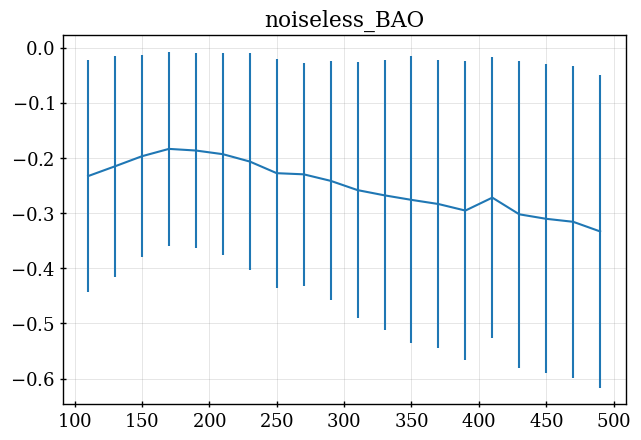

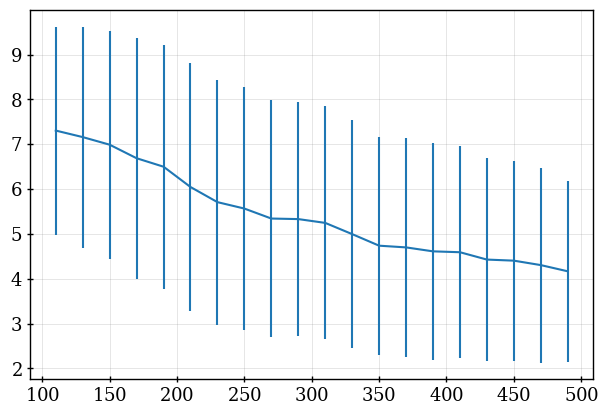

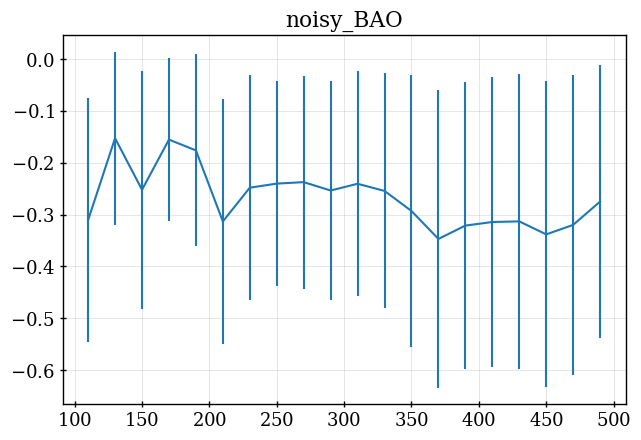

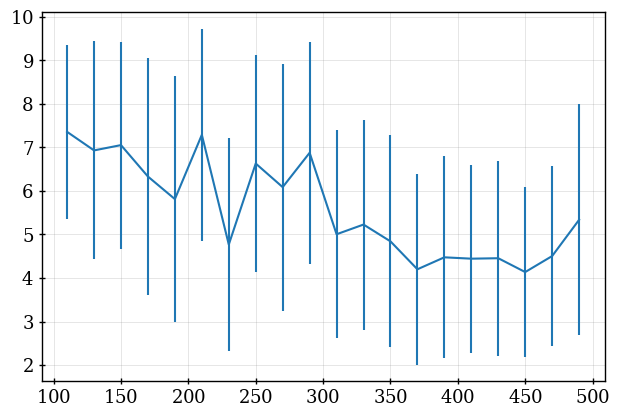

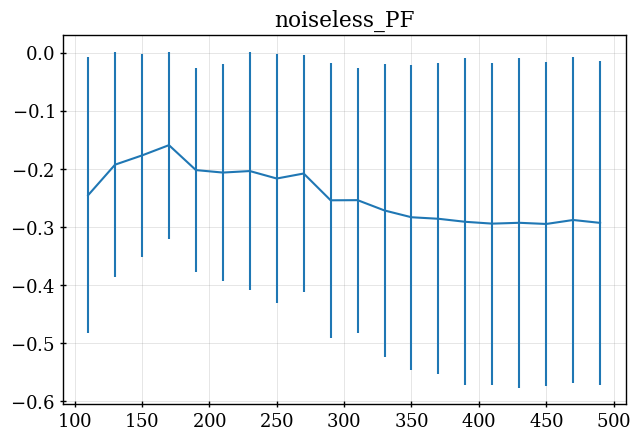

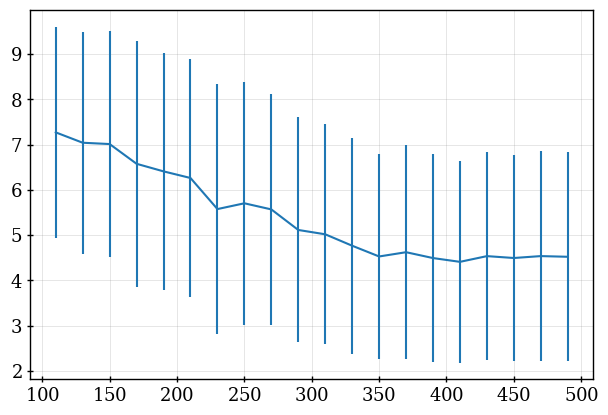

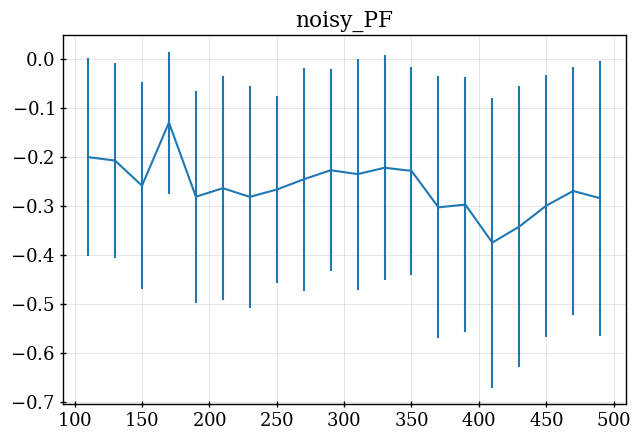

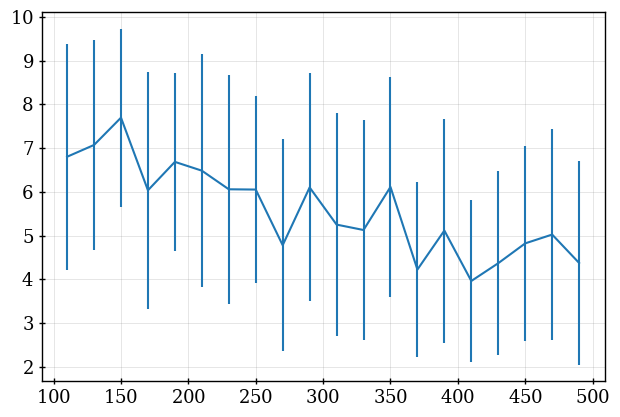

In [33]:
for x in results.keys():
    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m3'],yerr = results[x]['std_m3'])
    plt.title(x)

    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m1'],yerr = results[x]['std_m1'])
